# Connect to Drive & Read

In [1]:
# pip install plotly==4.5.0

In [2]:
from google.colab import drive
import pandas as pd, numpy as np
from plotly import express as px
#  pip install -U kaleido

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_pickle("/content/drive/MyDrive/CMG - Crystal Prediction Project/Ternary Materials Point Group Prediction/Data/NOMAD_2/Classification_Data_8.pkl").dropna()
print(df.shape)
df.head()

(1381099, 24)


,Atomic Number 1,Atomic Number 2,Atomic Number 3,Element_1,Element_2,Element_3,Coefficient 1,Coefficient 2,Coefficient 3,formula_reduced,...,lattice_parameters,Oxidation 1,Oxidation 2,Oxidation 3,IonicRadius_1,IonicRadius_2,IonicRadius_3,IonizationPot1st_1,IonizationPot1st_2,IonizationPot1st_3
0,3,5,41,Li,B,Nb,4,1,1,BLi4Nb,...,"{'a': 6.71860936e-10, 'b': 6.71860936e-10, 'c'...",1,-1,-3,0.755440,1.048943,1.842691,5.3917,8.298,6.7589
1,4,5,41,Be,B,Nb,4,1,1,BBe4Nb,...,"{'a': 6.119642980000002e-10, 'b': 6.1196429800...",1,-1,-3,0.643658,1.048943,1.842691,9.3226,8.298,6.7589
2,4,5,41,Be,B,Nb,2,1,1,BBe2Nb,...,"{'a': 5.458027e-10, 'b': 5.458027e-10, 'c': 5....",2,-1,-3,0.452080,1.048943,1.842691,9.3226,8.298,6.7589
3,4,5,41,Be,B,Nb,2,1,1,BBe2Nb,...,"{'a': 5.420156379999999e-10, 'b': 5.4201563799...",2,-1,-3,0.452080,1.048943,1.842691,9.3226,8.298,6.7589
4,4,5,41,Be,B,Nb,2,1,1,BBe2Nb,...,"{'a': 4.660283620000524e-10, 'b': 8.41781306e-...",2,-1,-3,0.452080,1.048943,1.842691,9.3226,8.298,6.7589


**Config**

In [ ]:
FEATURE_NAMES = [
#     "Atomic Number 1","Atomic Number 2","Atomic Number 3",
    "Coefficient 1", "Coefficient 2", "Coefficient 3", 
    "IonizationPot1st_1", "IonizationPot1st_2", "IonizationPot1st_3", 
    "Oxidation 1", "Oxidation 2", "Oxidation 3", # Used to be electronegativity 
    "IonicRadius_1", "IonicRadius_2", "IonicRadius_3"
]

GROUPERS = [
    "Atomic Number 1","Atomic Number 2","Atomic Number 3",
    "Coefficient 1", "Coefficient 2", "Coefficient 3"
]

# Y_NAME = 'crystal_system'
# Y_NAME = 'bravais_lattice'
# Y_NAME = 'point_group'
Y_NAME = 'space_group_number'

# Preprocess

In [ ]:
df['crystal_system'].replace(to_replace="trigonal", value="hexagonal", inplace=True)
df['space_group_number'] = df['space_group_number'].astype(int)

In [ ]:
df_dedup = df[FEATURE_NAMES+[Y_NAME]].drop_duplicates().copy()
df_dedup[Y_NAME] = df_dedup[Y_NAME].astype(str)
df_dedup[Y_NAME].unique().shape

(207,)

In [ ]:
df_dedup

,Coefficient 1,Coefficient 2,Coefficient 3,IonizationPot1st_1,IonizationPot1st_2,IonizationPot1st_3,Oxidation 1,Oxidation 2,Oxidation 3,IonicRadius_1,IonicRadius_2,IonicRadius_3,space_group_number
0,4,1,1,5.3917,8.2980,6.7589,1,-1,-3,0.755440,1.048943,1.842691,216
1,4,1,1,9.3226,8.2980,6.7589,1,-1,-3,0.643658,1.048943,1.842691,216
2,2,1,1,9.3226,8.2980,6.7589,2,-1,-3,0.452080,1.048943,1.842691,216
3,2,1,1,9.3226,8.2980,6.7589,2,-1,-3,0.452080,1.048943,1.842691,225
4,2,1,1,9.3226,8.2980,6.7589,2,-1,-3,0.452080,1.048943,1.842691,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381094,1,2,1,8.2980,11.2603,14.5341,-1,2,-3,1.048943,0.361359,1.454877,17
1381095,1,2,1,8.2980,11.2603,14.5341,-1,2,-3,1.048943,0.361359,1.454877,115
1381096,1,1,3,9.3226,8.2980,11.2603,2,1,-1,0.452080,0.615119,1.065589,221
1381097,1,1,3,5.3917,9.3226,11.2603,1,2,-1,0.755440,0.452080,1.065589,221


# Side

In [ ]:
model = Sequential()
model.add(Conv1D(15,60, padding='valid', activation='relu',input_shape=(18000,1), strides = 1,  kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1)))
model.add(MaxPooling1D(2,data_format='channels_last'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Conv1D(30, 60, padding='valid', activation='relu',kernel_regularizer = regularizers.l1_l2(l1=0.1, l2=0.1), strides=1))
model.add(MaxPooling1D(4,data_format='channels_last'))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation = 'softmax'))

# End Side

In [ ]:
# value_counts = df_dedup[Y_NAME].value_counts()
# value_counts.index = value_counts.index.astype(str)
# fig = px.bar(x=value_counts.index, y=value_counts.values)
# fig.update_layout( 
#     width=3000,
#     yaxis=dict(title='Count'),
#     xaxis=dict(
#         title='Space Group',
#         tickmode='linear',
#         tickangle=60,
#         type='category'
#     )
# )

In [ ]:
# df['Counter'] = 1

In [ ]:
# sun_chart_df = df.groupby(['crystal_system', 'bravais_lattice', 'point_group', 'space_group_number'])['Counter'].sum().reset_index()

In [ ]:
# import plotly.express as px
# fig = px.sunburst(sun_chart_df, path=['crystal_system', 'bravais_lattice', 'point_group'], values='Counter')
# fig.update_layout(
#     autosize=False,
#     width=1200,
#     height=1200,)

# fig.write_image("images/fig1.svg")
# fig.show()

# Base Experiment

1. Resample
2. Groupby (Multi-Labeled data)
3. Multi-Label Encoding
4. Train-Test Split
5. Train

In [ ]:
accepted_classes = (df_dedup[Y_NAME].value_counts() > 200).replace(False, np.nan).dropna().index.tolist()
df_filtered = df_dedup[df_dedup[Y_NAME].isin(accepted_classes)].copy()
df_filtered[Y_NAME] = df_filtered[Y_NAME].astype(int)

print("Previous Data Size:", df_dedup.shape[0])
print("New Data Size:", df_filtered.shape[0])
print("Number of Classes Left:", len(accepted_classes))

Previous Data Size: 1381099
New Data Size: 1376481
Number of Classes Left: 67


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

df_grouped2 = df_filtered.groupby(FEATURE_NAMES)[Y_NAME].apply(list).reset_index()

In [ ]:
ml_binner = MultiLabelBinarizer()
ml_binner.fit(df_grouped2[Y_NAME])
y = ml_binner.transform(df_grouped2[Y_NAME])
X = df_grouped2[FEATURE_NAMES].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# from keras.models import Sequential
# from keras import regularizers
# from keras.layers import Conv1D, MaxPooling1D, Dropout, BatchNormalization, Flatten, Dense
# model = Sequential()
# model.add(Conv1D(15, 8, padding='same', activation='relu',input_shape=(12, 1), strides = 1,  kernel_regularizer=regularizers.l1_l2(l1=0.1, l2=0.1)))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Conv1D(30, 8, padding='same', activation='relu',kernel_regularizer = regularizers.l1_l2(l1=0.1, l2=0.1), strides=1))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())
# model.add(Flatten())
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(67, activation = 'softmax'))
# model.summary()

# model.compile()
# model.fit(X_train, y_train, batch_size=48, epochs=2)
# from keras.models import Model
# feature_vectors_model = Model(model.input, model.get_layer('dense_16').output)
# dtc_features = feature_vectors_model.predict(X_train)
# ...
# dtc_features_test = feature_vectors_model.predict(X_test)


In [ ]:
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ml_binner.classes_
print(classification_report(y_test, y_pred, target_names=[str(i) for i in target_names]))

              precision    recall  f1-score   support

           1       0.56      0.19      0.28       221
           2       0.72      0.28      0.40       316
           4       0.74      0.21      0.33        66
           5       0.44      0.13      0.20        54
           6       0.82      0.89      0.85     10039
           7       0.67      0.34      0.45        41
           8       0.91      0.96      0.93     12102
           9       0.60      0.12      0.20        49
          10       0.93      0.98      0.96     12587
          11       0.85      0.33      0.48       141
          12       0.91      0.96      0.93     12640
          13       0.82      0.25      0.38        56
          14       0.69      0.31      0.42       415
          15       0.73      0.38      0.50       298
          19       0.46      0.12      0.19        51
          25       0.75      0.72      0.73      7171
          31       0.64      0.16      0.25        44
          33       0.67    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Iterations

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, balanced_accuracy_score, matthews_corrcoef, confusion_matrix

def prepare_train_test(df):
    ml_binner = MultiLabelBinarizer()
    ml_binner.fit(df[Y_NAME])
    y = ml_binner.transform(df[Y_NAME])
    X = df[FEATURE_NAMES].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test, ml_binner

def get_confusion(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return TN, TP, FN, FP

def calc_wba_wmcc_conf(y_true, y_pred):
    """Calculated the weighted balanced accuracy and mathews correlation coefficient
    """
    n_lst = []
    ba_lst = []
    mcc_lst = []
    tn_lst = []
    tp_lst = []
    fn_lst = []
    fp_lst = []
    for idx in range(y_true.shape[1]):
        class_true = y_true[:, idx]
        class_preds = y_pred[:, idx]
        N = sum(class_true)
        BA = balanced_accuracy_score(class_true, class_preds, adjusted=False)
        MCC = matthews_corrcoef(class_true, class_preds)
        TN, TP, FN, FP = get_confusion(class_true, class_preds)

        n_lst.append(N)
        mcc_lst.append(MCC)
        ba_lst.append(BA)

        tn_lst.append(TN)
        tp_lst.append(TP)
        fn_lst.append(FN)
        fp_lst.append(FP)

    weighted_balanced_acc = sum([n*ba for n,ba in zip(n_lst,ba_lst)]) / sum(sum(y_true))
    weighted_mcc = sum([n*mcc for n,mcc in zip(n_lst, mcc_lst)]) / sum(sum(y_true))
    sum_tn = sum(tn_lst)
    sum_tp = sum(tp_lst)
    sum_fn = sum(fn_lst)
    sum_fp = sum(fp_lst)

    return weighted_balanced_acc, weighted_mcc, sum_tn, sum_tp, sum_fn, sum_fp

def evaluate(y_true, y_pred):
    micro_f1 = f1_score(y_true, y_pred, average='micro')
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    WBA, WMCC, TN, TP, FN, FP = calc_wba_wmcc_conf(y_true, y_pred)
    metrics = {
        "WMCC": WMCC ,
        "micro_f1": micro_f1,
        "macro_f1": macro_f1,
        "WBA": WBA,
        "TN":TN,
        "TP":TP, 
        "FN":FN,
        "FP":FP
    }
    return metrics

def filter_y(df, min_class_size):
    accepted_classes = (df[Y_NAME].value_counts() > min_class_size).replace(False, np.nan).dropna().index.tolist()
    df_filtered = df[df[Y_NAME].isin(accepted_classes)].copy()
    return df_filtered

In [ ]:
df_main = df_dedup.copy()


In [ ]:
experiments = []
2**16

65536

In [ ]:
Y_NAME

'space_group_number'

In [ ]:
# class_variables = ["crystal_system", "bravais_lattice", "point_group", "space_group_number"]
# class_variable_sizes = [6, 14, 32]

# crystal_system:  06 --------
# bravais_lattice: 14
# point_group:     32
df_main[Y_NAME].value_counts()[:50]

216    153259
225    106156
221    102283
166     68748
123     68739
65      68090
99      67814
12      63158
10      62561
119     61257
47      60773
8       60667
139     58528
44      55379
35      51281
6       50088
71      45098
25      35995
107     23279
156     22564
160     19170
42      17432
38      15188
187      8551
62       3492
14       2137
227      1997
63       1638
194      1626
148      1497
15       1466
2        1426
1        1098
69       1062
164      1028
129       829
55        816
189       800
11        669
141       560
186       534
191       508
127       476
59        462
193       378
36        373
140       357
74        343
4         334
33        307
Name: space_group_number, dtype: int64

In [ ]:
df_filtered = filter_y(df_main, 300)
df_agg = df_filtered.groupby(FEATURE_NAMES)[Y_NAME].apply(list).reset_index()

df_agg.head()

,Coefficient 1,Coefficient 2,Coefficient 3,IonizationPot1st_1,IonizationPot1st_2,IonizationPot1st_3,Oxidation 1,Oxidation 2,Oxidation 3,IonicRadius_1,IonicRadius_2,IonicRadius_3,space_group_number
0,1,1,1,4.3407,5.2117,6.1083,-1,2,-1,1.792941,1.345410,1.806147,"[216, 107, 156]"
1,1,1,1,4.3407,5.2117,6.8251,1,1,-2,1.389265,1.588994,1.769692,"[216, 44, 42, 107, 156]"
2,1,1,1,4.3407,5.2117,7.2890,-1,2,-1,1.792941,1.345410,1.970947,"[216, 194, 42, 107, 156]"
3,1,1,1,4.3407,5.2117,7.4167,-1,2,-1,1.792941,1.345410,1.913548,"[216, 44, 107, 156]"
4,1,1,1,4.3407,5.2117,7.8800,-1,2,-1,1.792941,1.345410,1.431614,"[216, 42, 44, 107, 156]"


In [ ]:
X_train, X_test, y_train, y_test, ml_binner = prepare_train_test(df_agg)
clf = RandomForestClassifier(n_estimators=50, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
df_all_evalll

,WMCC,micro_f1,macro_f1,WBA,TN,TP,FN,FP,Variable
0,0.901543,0.918282,0.667595,0.953533,2907366,253853,21080,24101,Space Group
0,0.954690,0.964904,0.724961,0.974795,1085896,196919,8805,5520,Point Group
0,0.957876,0.966740,0.896334,0.978567,716627,181212,6335,6134,Bravais Lattice
0,0.960160,0.979692,0.876200,0.978721,253777,130927,3523,1905,Crystal System


In [ ]:
sg_eval_dict = evaluate(y_test, y_pred)

In [ ]:
df_all_evalll

,WMCC,micro_f1,macro_f1,WBA,TN,TP,FN,FP,Variable
0,0.901543,0.918282,0.667595,0.953533,2907366,253853,21080,24101,Space Group
0,0.954690,0.964904,0.724961,0.974795,1085896,196919,8805,5520,Point Group
0,0.957876,0.966740,0.896334,0.978567,716627,181212,6335,6134,Bravais Lattice
0,0.960160,0.979692,0.876200,0.978721,253777,130927,3523,1905,Crystal System


[0.9015428020145363, 0.9535325911195383]

In [ ]:
sg_df = pd.DataFrame(sg_eval_dict, index=[0])
sg_df["Variable"] = "Space Group"

pg_df = pd.DataFrame(pg_eval_dict, index=[0])
pg_df["Variable"] = "Point Group"

bl_df = pd.DataFrame(bl_eval_dict, index=[0])
bl_df["Variable"] = "Bravais Lattice"

cs_df = pd.DataFrame(cs_eval_dict, index=[0])
cs_df["Variable"] = "Crystal System"

df_all_evalll = pd.concat([
           sg_df,
           pg_df,
           bl_df,
           cs_df
])

import plotly.graph_objects as go


# fig = go.Figure(data=[
#     go.Bar(name='WMCC', x=df_all_evalll['Variable'].tolist(), y=df_all_evalll["WMCC"]),
#     go.Bar(name='WBA', x=df_all_evalll['Variable'].tolist(), y=df_all_evalll["WBA"])
# ])

fig = go.Figure(data=[
    go.Bar(name='Space Group', x=["WMCC", "WBA"], 
           y=df_all_evalll[df_all_evalll["Variable"] == "Space Group"][["WMCC", "WBA"]].values.tolist()[0]),

    go.Bar(name='Point Group', x=["WMCC", "WBA"], 
           y=df_all_evalll[df_all_evalll["Variable"] == "Point Group"][["WMCC", "WBA"]].values.tolist()[0]),

    go.Bar(name='Bravais Lattice', x=["WMCC", "WBA"], 
           y=df_all_evalll[df_all_evalll["Variable"] == "Bravais Lattice"][["WMCC", "WBA"]].values.tolist()[0]),

    go.Bar(name='Crystal System', x=["WMCC", "WBA"], 
           y=df_all_evalll[df_all_evalll["Variable"] == "Crystal System"][["WMCC", "WBA"]].values.tolist()[0])
])
# Change the bar mode
fig.show()
fig.write_image("fig3.svg")

In [ ]:
sg_eval_dict


{'FN': 21080,
 'FP': 24101,
 'TN': 2907366,
 'TP': 253853,
 'WBA': 0.9535325911195383,
 'WMCC': 0.9015428020145363,
 'macro_f1': 0.6675949719948173,
 'micro_f1': 0.9182816741938226}

In [ ]:
pg_eval_dict


{'FN': 8805,
 'FP': 5520,
 'TN': 1085896,
 'TP': 196919,
 'WBA': 0.974795361238319,
 'WMCC': 0.9546898457427669,
 'macro_f1': 0.7249605463386128,
 'micro_f1': 0.9649037271874227}

In [ ]:
bl_eval_dict

{'FN': 6335,
 'FP': 6134,
 'TN': 716627,
 'TP': 181212,
 'WBA': 0.9785667749758296,
 'WMCC': 0.9578755933647827,
 'macro_f1': 0.896334202512856,
 'micro_f1': 0.9667398431018984}

In [ ]:
cs_eval_dict

{'FN': 3523,
 'FP': 1905,
 'TN': 253777,
 'TP': 130927,
 'WBA': 0.9787205408958154,
 'WMCC': 0.9601602206396597,
 'macro_f1': 0.8762001817963748,
 'micro_f1': 0.9796918610306717}

In [ ]:
y_pred.shape

(65022, 6)

In [ ]:
y_test.shape[1]

6

### Size vs Score

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, matthews_corrcoef
classes = df_agg[Y_NAME].explode().unique()
frame_dict = {
    "Class": [],
    "BA": [],
    "nMCC": [],
    "F1": [],
    "Size": []
}

for idx in range(y_test.shape[1]):
    class_test = y_test[:, idx]
    class_pred = y_pred[:, idx]
    class_name = classes[idx]
    ba = balanced_accuracy_score(class_test, class_pred)
    f1 = f1_score(class_test, class_pred)
    mathew = (matthews_corrcoef(class_test, class_pred)+ 1) / 2
    support = sum(class_test)
    frame_dict['Class'].append(class_name) 
    frame_dict['BA'].append(ba)
    frame_dict['F1'].append(f1)
    frame_dict['nMCC'].append(mathew)
    frame_dict['Size'].append(support)

In [ ]:
# df_eval_sg = pd.DataFrame(frame_dict)
# df_eval_sg['Variable'] = "Space Group"

# df_eval_pg = pd.DataFrame(frame_dict)
# df_eval_pg['Variable'] = "Point Group"

# df_eval_bl = pd.DataFrame(frame_dict)
# df_eval_bl['Variable'] = "Bravais Lattice"

df_eval_cs = pd.DataFrame(frame_dict)
df_eval_cs['Variable'] = "Crystal System"
# df_eval_sg.plot()

In [ ]:
# df_eval_sg.to_csv("sg_eval.csv", header=True, index=False)
# df_eval_pg.to_csv("pg_eval.csv", header=True, index=False)
# df_eval_bl.to_csv("bl_eval.csv", header=True, index=False)
df_eval_cs.to_csv("cs_eval.csv", header=True, index=False)


In [ ]:
df_eval_all = pd.concat([df_eval_sg, df_eval_pg, df_eval_bl, df_eval_cs])
df_eval_all.head()

,Class,BA,nMCC,F1,Size,Variable
0,216,0.611951,0.699578,0.341297,223,Space Group
1,107,0.981584,0.972594,0.955813,12553,Space Group
2,156,0.997328,0.997182,0.994776,4688,Space Group
3,44,0.613957,0.702664,0.346667,114,Space Group
4,42,0.976996,0.970887,0.952985,12325,Space Group


In [ ]:
df_eval_all['Avg. Score'] = df_eval_all[['BA', 'nMCC']].mean(axis=1)

In [ ]:
df_eval_all.to_csv("eval_all.csv", header=True, index=False)


In [ ]:
pip install -U kaleido

     |████████████████████████████████| 79.9 MB 804 kB/s 


In [ ]:
df_eval_all = pd.read_csv("eval_all.csv")
df_eval_all['point_size'] = 10

In [ ]:
import plotly.express as px
fig = px.scatter(df_eval_all, x="Size", y="Avg. Score", color="Variable", width=1200, log_x=True, size='point_size', trendline="ols")
fig.update_traces(marker={'size': 15})
fig.show()
fig.write_image("fig1.svg")

In [ ]:
df_eval_all["Size_log"] = df_eval_all["Size"].apply(np.log10)

In [ ]:
import plotly.express as px
fig = px.histogram(df_eval_all, x="Size_log", nbins=15, color="Variable", width=1200)
fig.write_image("fig2.svg")
fig.show()

In [ ]:
print(classification_report(y_test, 
                                    y_pred, 
                                    target_names=df_agg['space_group_number'].explode().unique()))

              precision    recall  f1-score   support

         216       0.71      0.22      0.34       223
         107       0.93      0.98      0.96     12553
         156       0.99      1.00      0.99      4688
          44       0.72      0.23      0.35       114
          42       0.94      0.97      0.95     12325
         194       0.91      0.96      0.93     12619
         187       0.99      0.99      0.99     13785
          12       0.86      0.53      0.65       102
         129       0.75      0.29      0.42       162
         186       0.87      0.93      0.90     11762
           8       0.71      0.31      0.43       427
          62       0.90      0.44      0.59        79
         189       0.68      0.38      0.49       110
          38       0.77      0.70      0.73       274
         160       0.76      0.37      0.50       290
          63       0.97      0.97      0.97      4550
          59       0.36      0.15      0.21      3823
          11       0.81    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
report_dict = classification_report(y_test, 
                                    y_pred, 
                                    target_names=df_agg['space_group_number'].explode().unique(),
                                    output_dict=True)

scores = [elem['f1-score'] for elem in report_dict.values()]
scores

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.3412969283276451,
 0.955812689290984,
 0.994775562426698,
 0.3466666666666667,
 0.9529848067950711,
 0.9333179599523425,
 0.9934977659922263,
 0.6545454545454545,
 0.4177777777777778,
 0.8992489842820208,
 0.43322475570032576,
 0.5932203389830508,
 0.4883720930232559,
 0.734225621414914,
 0.49884526558891457,
 0.9695709281961471,
 0.20815490597654068,
 0.5174825174825175,
 0.9901155607238897,
 0.5413533834586467,
 0.64549578742709,
 0.49799196787148586,
 0.6748466257668712,
 0.7969924812030076,
 0.48000000000000004,
 0.36702127659574474,
 0.9975704012914377,
 0.9996337264669255,
 0.9977010415689218,
 0.8824273072060683,
 0.7442710530015464,
 0.16129032258064516,
 0.8695652173913043,
 0.5,
 0.5121852152721365,
 0.27906976744186046,
 0.8686538723288417,
 0.7130464364687873,
 0.9403805831388218,
 0.5263157894736842,
 0.5373134328358209,
 0.8471322521159393,
 0.5019762845849801,
 0.4835680751173709,
 0.9773237701948851,
 0.07111111111111111,
 0.7434560379988642,
 0.37037037037037035,
 0

In [ ]:
import gc
import pickle
thresholds = [1426 -1] # + list(df_main[Y_NAME].value_counts().values[::-1])

# for power in range(8, 17):
for threshold in thresholds:
    # threshold = 2**power
    
    # Filter
    df_filtered = filter_y(df_main, threshold)
    print("Number of Classes", df_filtered[Y_NAME].unique().shape)

    # Group
    df_agg = df_filtered.groupby(FEATURE_NAMES)[Y_NAME].apply(list).reset_index()

    # Prepare
    X_train, X_test, y_train, y_test, ml_binner = prepare_train_test(df_agg)

    # Learning
    clf = RandomForestClassifier(n_estimators=50, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Model is fitted.")

    # Evaluate
    eval_dict = evaluate(y_test, y_pred)

    n_classes = df_filtered[Y_NAME].unique().shape[0]
    data_size = df_agg.shape[0]

    exp = {
        "n_classes": n_classes,
        "thresh": threshold,
        "data_size": data_size,
        "evaluation": eval_dict
    }
    del df_agg, X_train, X_test, y_train, y_test, ml_binner, clf, eval_dict
    gc.collect()

    experiments.append(exp)

    with open('/content/drive/MyDrive/TemporaryColabData/comp_cs6.pkl', 'wb') as f:
        pickle.dump(experiments, f)

    for key,val in exp.items():
        print(key, ":", val)
        print("-"*20)

Number of Classes (32,)
Model is fitted.
n_classes : 32
--------------------
thresh : 1425
--------------------
data_size : 315562
--------------------
evaluation : {'WMCC': 0.9058032262340892, 'micro_f1': 0.9217371279854375, 'macro_f1': 0.7932444241728414, 'WBA': 0.9562607492590521, 'TN': 1724627, 'TP': 252167, 'FN': 19321, 'FP': 23501}
--------------------


In [ ]:
# var_size_exp_dict = {}
# class_variable_exp_dict["6"] 
# class_variable_exp_dict["14"] 
# class_variable_exp_dict["32"]

### 6 CLASSES

**Crystal System**

In [ ]:
# cs6_eval = exp
# cs6_eval

{'data_size': 325107,
 'evaluation': {'FN': 3523,
  'FP': 1905,
  'TN': 253777,
  'TP': 130927,
  'WBA': 0.9787205408958154,
  'WMCC': 0.9601602206396597,
  'macro_f1': 0.8762001817963748,
  'micro_f1': 0.9796918610306717},
 'n_classes': 6,
 'thresh': 0}

**Bravais Lattice**

In [ ]:
# bl6_eval = exp
# bl6_eval

{'data_size': 310100,
 'evaluation': {'FN': 2132,
  'FP': 3024,
  'TN': 246810,
  'TP': 120154,
  'WBA': 0.9867948849441247,
  'WMCC': 0.9717741170809973,
  'macro_f1': 0.9725786428442268,
  'micro_f1': 0.978994883160056},
 'n_classes': 6,
 'thresh': 71085}

**Point Group**

In [ ]:
pg6_eval = exp
pg6_eval

{'data_size': 313114,
 'evaluation': {'FN': 1535,
  'FP': 1610,
  'TN': 234607,
  'TP': 137986,
  'WBA': 0.9916820616026192,
  'WMCC': 0.9834233837230557,
  'macro_f1': 0.9849053058283141,
  'micro_f1': 0.9887323237208768},
 'n_classes': 6,
 'thresh': 76492}

**Space Group**

In [ ]:
sg6_eval = exp
sg6_eval

{'data_size': 297683,
 'evaluation': {'FN': 293,
  'FP': 723,
  'TN': 243497,
  'TP': 112709,
  'WBA': 0.9974856655432003,
  'WMCC': 0.9938407807137909,
  'macro_f1': 0.9942673152301138,
  'micro_f1': 0.9955130413277158},
 'n_classes': 6,
 'thresh': 68089}

---

In [ ]:
var_size_exp_dict["6"] = {
    "CS": cs6_eval,
    "BL": bl6_eval,
    "PG": pg6_eval,
    "SG": sg6_eval,
}

### 14 CLASSES

**Bravais Lattice**

In [ ]:
bl14_eval = exp
bl14_eval

{'data_size': 325107,
 'evaluation': {'FN': 6335,
  'FP': 6134,
  'TN': 716627,
  'TP': 181212,
  'WBA': 0.9785667749758296,
  'WMCC': 0.9578755933647827,
  'macro_f1': 0.896334202512856,
  'micro_f1': 0.9667398431018984},
 'n_classes': 14,
 'thresh': 0}

**Point Group**

In [ ]:
pg14_eval = exp
pg14_eval

{'data_size': 322306,
 'evaluation': {'FN': 8003,
  'FP': 5168,
  'TN': 693448,
  'TP': 195849,
  'WBA': 0.9767196580340277,
  'WMCC': 0.9580449211418385,
  'macro_f1': 0.8891328814672379,
  'micro_f1': 0.9674684898078144},
 'n_classes': 14,
 'thresh': 1546}

**Space Group**

In [ ]:
sg14_eval = exp
sg14_eval

{'data_size': 305036,
 'evaluation': {'FN': 5580,
  'FP': 11332,
  'TN': 632356,
  'TP': 204844,
  'WBA': 0.9801344306516802,
  'WMCC': 0.9516768231255655,
  'macro_f1': 0.9506926400832185,
  'micro_f1': 0.9603563056727614},
 'n_classes': 14,
 'thresh': 55378}

----

In [ ]:
var_size_exp_dict["14"] = {
    "BL": bl14_eval,
    "PG": pg14_eval,
    "SG": sg14_eval,
}

In [ ]:
var_size_exp_dict

{'14': {'BL': {'data_size': 325107,
   'evaluation': {'FN': 6335,
    'FP': 6134,
    'TN': 716627,
    'TP': 181212,
    'WBA': 0.9785667749758296,
    'WMCC': 0.9578755933647827,
    'macro_f1': 0.896334202512856,
    'micro_f1': 0.9667398431018984},
   'n_classes': 14,
   'thresh': 0},
  'PG': {'data_size': 322306,
   'evaluation': {'FN': 8003,
    'FP': 5168,
    'TN': 693448,
    'TP': 195849,
    'WBA': 0.9767196580340277,
    'WMCC': 0.9580449211418385,
    'macro_f1': 0.8891328814672379,
    'micro_f1': 0.9674684898078144},
   'n_classes': 14,
   'thresh': 1546},
  'SG': {'data_size': 305036,
   'evaluation': {'FN': 5580,
    'FP': 11332,
    'TN': 632356,
    'TP': 204844,
    'WBA': 0.9801344306516802,
    'WMCC': 0.9516768231255655,
    'macro_f1': 0.9506926400832185,
    'micro_f1': 0.9603563056727614},
   'n_classes': 14,
   'thresh': 55378}},
 '6': {'BL': {'data_size': 310100,
   'evaluation': {'FN': 2132,
    'FP': 3024,
    'TN': 246810,
    'TP': 120154,
    'WBA': 0.9

### CLASSES 32

**Point Groups**

In [ ]:
pg32_eval = exp
pg32_eval

{'data_size': 325107,
 'evaluation': {'FN': 9037,
  'FP': 5413,
  'TN': 1869480,
  'TP': 196774,
  'WBA': 0.9744565418138078,
  'WMCC': 0.9544003785729998,
  'macro_f1': 0.6145123683903895,
  'micro_f1': 0.9645831597213712},
 'n_classes': 32,
 'thresh': 0}

**Space Group**

In [ ]:
sg32_eval = exp
sg32_eval

{'data_size': 315562,
 'evaluation': {'FN': 19321,
  'FP': 23501,
  'TN': 1724627,
  'TP': 252167,
  'WBA': 0.9562607492590521,
  'WMCC': 0.9058032262340892,
  'macro_f1': 0.7932444241728414,
  'micro_f1': 0.9217371279854375},
 'n_classes': 32,
 'thresh': 1425}

---

In [ ]:
var_size_exp_dict["32"] = {
    "PG": pg32_eval,
    "SG": sg32_eval,
}

In [ ]:
var_size_exp_dict

{'14': {'BL': {'data_size': 325107,
   'evaluation': {'FN': 6335,
    'FP': 6134,
    'TN': 716627,
    'TP': 181212,
    'WBA': 0.9785667749758296,
    'WMCC': 0.9578755933647827,
    'macro_f1': 0.896334202512856,
    'micro_f1': 0.9667398431018984},
   'n_classes': 14,
   'thresh': 0},
  'PG': {'data_size': 322306,
   'evaluation': {'FN': 8003,
    'FP': 5168,
    'TN': 693448,
    'TP': 195849,
    'WBA': 0.9767196580340277,
    'WMCC': 0.9580449211418385,
    'macro_f1': 0.8891328814672379,
    'micro_f1': 0.9674684898078144},
   'n_classes': 14,
   'thresh': 1546},
  'SG': {'data_size': 305036,
   'evaluation': {'FN': 5580,
    'FP': 11332,
    'TN': 632356,
    'TP': 204844,
    'WBA': 0.9801344306516802,
    'WMCC': 0.9516768231255655,
    'macro_f1': 0.9506926400832185,
    'micro_f1': 0.9603563056727614},
   'n_classes': 14,
   'thresh': 55378}},
 '32': {'PG': {'data_size': 325107,
   'evaluation': {'FN': 9037,
    'FP': 5413,
    'TN': 1869480,
    'TP': 196774,
    'WBA': 0

In [ ]:


for size, classes in var_size_exp_dict.items():
    print(size, class_)

6 {'CS': {'n_classes': 6, 'thresh': 0, 'data_size': 325107, 'evaluation': {'WMCC': 0.9601602206396597, 'micro_f1': 0.9796918610306717, 'macro_f1': 0.8762001817963748, 'WBA': 0.9787205408958154, 'TN': 253777, 'TP': 130927, 'FN': 3523, 'FP': 1905}}, 'BL': {'n_classes': 6, 'thresh': 71085, 'data_size': 310100, 'evaluation': {'WMCC': 0.9717741170809973, 'micro_f1': 0.978994883160056, 'macro_f1': 0.9725786428442268, 'WBA': 0.9867948849441247, 'TN': 246810, 'TP': 120154, 'FN': 2132, 'FP': 3024}}, 'PG': {'n_classes': 6, 'thresh': 76492, 'data_size': 313114, 'evaluation': {'WMCC': 0.9834233837230557, 'micro_f1': 0.9887323237208768, 'macro_f1': 0.9849053058283141, 'WBA': 0.9916820616026192, 'TN': 234607, 'TP': 137986, 'FN': 1535, 'FP': 1610}}, 'SG': {'n_classes': 6, 'thresh': 68089, 'data_size': 297683, 'evaluation': {'WMCC': 0.9938407807137909, 'micro_f1': 0.9955130413277158, 'macro_f1': 0.9942673152301138, 'WBA': 0.9974856655432003, 'TN': 243497, 'TP': 112709, 'FN': 293, 'FP': 723}}}
14 {'BL'

In [ ]:
# labels = ['6', '14', '32']

############# MACRO F1 ###############
# CS -> [6, 14, 32]
macro_f1_cs = [var_size_exp_dict['6']['CS']['evaluation']['macro_f1'], 0, 0]

# BL -> [6, 14, 32]
macro_f1_bl = [var_size_exp_dict['6']['BL']['evaluation']['macro_f1'], var_size_exp_dict['14']['BL']['evaluation']['macro_f1'], 0]

# PG -> [6, 14, 32]
macro_f1_pg = [var_size_exp_dict['6']['PG']['evaluation']['macro_f1'], var_size_exp_dict['14']['PG']['evaluation']['macro_f1'], var_size_exp_dict['32']['PG']['evaluation']['macro_f1']]

# SG -> [6, 14, 32]
macro_f1_sg = [var_size_exp_dict['6']['SG']['evaluation']['macro_f1'], var_size_exp_dict['14']['SG']['evaluation']['macro_f1'], var_size_exp_dict['32']['SG']['evaluation']['macro_f1']]



############# nMCC ###############
# CS -> [6, 14, 32]
mcc_cs = [((var_size_exp_dict['6']['CS']['evaluation']['WMCC']+ 1) / 2), 0, 0]

# BL -> [6, 14, 32]
mcc_bl = [((var_size_exp_dict['6']['BL']['evaluation']['WMCC']+ 1) / 2), ((var_size_exp_dict['14']['BL']['evaluation']['WMCC']+ 1) / 2), 0]

# PG -> [6, 14, 32]
mcc_pg = [((var_size_exp_dict['6']['PG']['evaluation']['WMCC']+ 1) / 2), ((var_size_exp_dict['14']['PG']['evaluation']['WMCC']+ 1) / 2), ((var_size_exp_dict['32']['PG']['evaluation']['WMCC']+ 1) / 2)]

# SG -> [6, 14, 32]
mcc_sg = [((var_size_exp_dict['6']['SG']['evaluation']['WMCC']+ 1) / 2), ((var_size_exp_dict['14']['SG']['evaluation']['WMCC']+ 1) / 2), ((var_size_exp_dict['32']['SG']['evaluation']['WMCC']+ 1) / 2)]



############# Micro F1 Score ###############
# CS -> [6, 14, 32]
micro_f1_cs = [var_size_exp_dict['6']['CS']['evaluation']['micro_f1'], 0, 0]

# BL -> [6, 14, 32]
micro_f1_bl = [var_size_exp_dict['6']['BL']['evaluation']['micro_f1'], var_size_exp_dict['14']['BL']['evaluation']['micro_f1'], 0]

# PG -> [6, 14, 32]
micro_f1_pg = [var_size_exp_dict['6']['PG']['evaluation']['micro_f1'], var_size_exp_dict['14']['PG']['evaluation']['micro_f1'], var_size_exp_dict['32']['PG']['evaluation']['micro_f1']]

# SG -> [6, 14, 32]
micro_f1_sg = [var_size_exp_dict['6']['SG']['evaluation']['micro_f1'], var_size_exp_dict['14']['SG']['evaluation']['micro_f1'], var_size_exp_dict['32']['SG']['evaluation']['micro_f1']]



############# WBA ###############
# CS -> [6, 14, 32]
WBA_cs = [var_size_exp_dict['6']['CS']['evaluation']['WBA'], 0, 0]

# BL -> [6, 14, 32]
WBA_bl = [var_size_exp_dict['6']['BL']['evaluation']['WBA'], var_size_exp_dict['14']['BL']['evaluation']['WBA'], 0]

# PG -> [6, 14, 32]
WBA_pg = [var_size_exp_dict['6']['PG']['evaluation']['WBA'], var_size_exp_dict['14']['PG']['evaluation']['WBA'], var_size_exp_dict['32']['PG']['evaluation']['WBA']]

# SG -> [6, 14, 32]
WBA_sg = [var_size_exp_dict['6']['SG']['evaluation']['WBA'], var_size_exp_dict['14']['SG']['evaluation']['WBA'], var_size_exp_dict['32']['SG']['evaluation']['WBA']]



############# FN ###############
# CS -> [6, 14, 32]
FN_cs = [var_size_exp_dict['6']['CS']['evaluation']['FN'], 0, 0]

# BL -> [6, 14, 32]
FN_bl = [var_size_exp_dict['6']['BL']['evaluation']['FN'], var_size_exp_dict['14']['BL']['evaluation']['FN'], 0]

# PG -> [6, 14, 32]
FN_pg = [var_size_exp_dict['6']['PG']['evaluation']['FN'], var_size_exp_dict['14']['PG']['evaluation']['FN'], var_size_exp_dict['32']['PG']['evaluation']['FN']]

# SG -> [6, 14, 32]
FN_sg = [var_size_exp_dict['6']['SG']['evaluation']['FN'], var_size_exp_dict['14']['SG']['evaluation']['FN'], var_size_exp_dict['32']['SG']['evaluation']['FN']]



############# FP ###############
# CS -> [6, 14, 32]
FP_cs = [var_size_exp_dict['6']['CS']['evaluation']['FP'], 0, 0]

# BL -> [6, 14, 32]
FP_bl = [var_size_exp_dict['6']['BL']['evaluation']['FP'], var_size_exp_dict['14']['BL']['evaluation']['FP'], 0]

# PG -> [6, 14, 32]
FP_pg = [var_size_exp_dict['6']['PG']['evaluation']['FP'], var_size_exp_dict['14']['PG']['evaluation']['FP'], var_size_exp_dict['32']['PG']['evaluation']['FP']]

# SG -> [6, 14, 32]
FP_sg = [var_size_exp_dict['6']['SG']['evaluation']['FP'], var_size_exp_dict['14']['SG']['evaluation']['FP'], var_size_exp_dict['32']['SG']['evaluation']['FP']]





# var_size_exp_dict['6']['BL']['evaluation']['macro_f1']
# var_size_exp_dict['6']['PG']['evaluation']['macro_f1']
# var_size_exp_dict['6']['SG']['evaluation']['macro_f1']

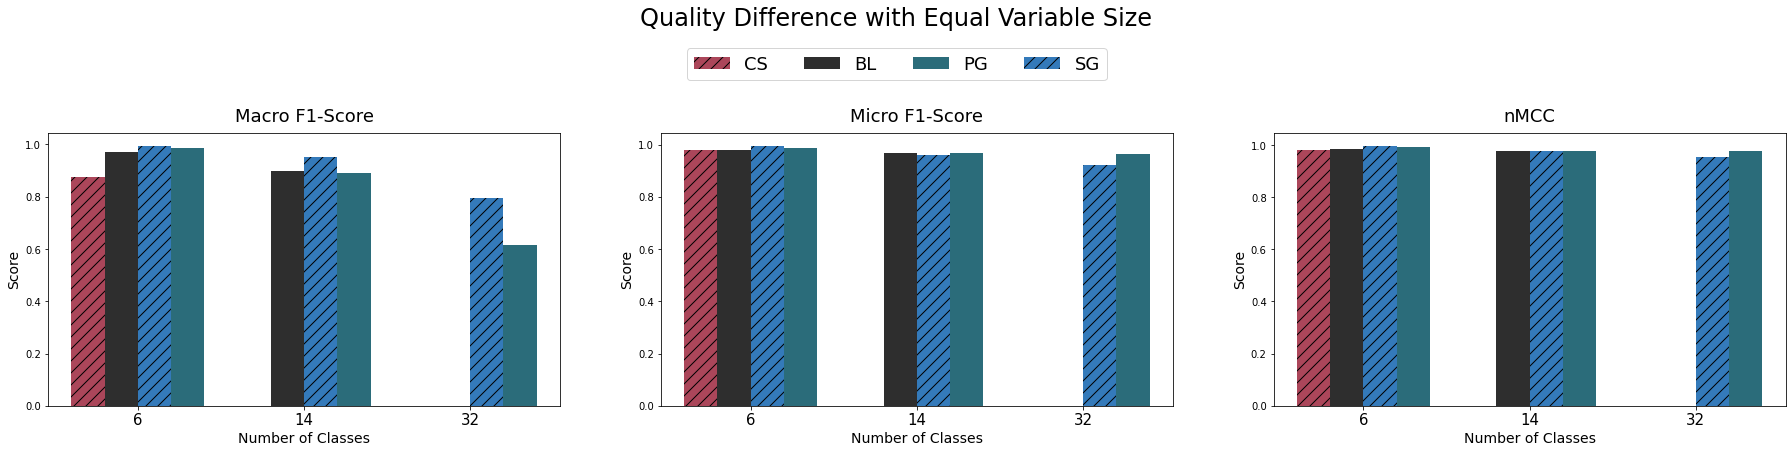

In [ ]:
from matplotlib import pyplot as plt

labels = ['6', '14', '32']
x = np.arange(len(labels))
width = 0.2

fig = plt.figure(figsize=(25,5))

###### MACRO F1
plt.subplot(1, 3, 1)
plt.title('Macro F1-Score', fontsize=18, y=1.02)
plt.bar(x-1.5*width, macro_f1_cs, width, label='CS', hatch='//', color="#ab465a")
plt.bar(x-0.5*width, macro_f1_bl, width, label='BL', color="#2E2E2E")
plt.bar(x+1.5*width, macro_f1_pg, width, label='PG', color="#2b6c7a")
plt.bar(x+0.5*width, macro_f1_sg, width, label='SG', hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)


###### MICRO F1
plt.subplot(1, 3, 2)
plt.title('Micro F1-Score', fontsize=18, y=1.02)
plt.bar(x-1.5*width, micro_f1_cs, width, hatch='//', color="#ab465a")
plt.bar(x-0.5*width, micro_f1_bl, width, color="#2E2E2E")
plt.bar(x+1.5*width, micro_f1_pg, width, color="#2b6c7a")
plt.bar(x+0.5*width, micro_f1_sg, width, hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)


# ###### MCC
plt.subplot(1, 3, 3)
plt.title('nMCC', fontsize=18, y=1.02)
plt.bar(x-1.5*width, mcc_cs, width, hatch='//', color="#ab465a")
plt.bar(x-0.5*width, mcc_bl, width, color="#2E2E2E")
plt.bar(x+1.5*width, mcc_pg, width, color="#2b6c7a")
plt.bar(x+0.5*width, mcc_sg, width, hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)


plt.figlegend(loc='upper right', ncol=4, labelspacing=0.5, fontsize=18, bbox_to_anchor=(0.62, 1.15))
plt.suptitle('Quality Difference with Equal Variable Size', fontsize=24, y=1.25)
plt.tight_layout(w_pad=6)
plt.show()

In [ ]:
fig.savefig('quality_diff_eq_var_size1.png')   # save the figure to file
plt.close(fig)    # close the figure window

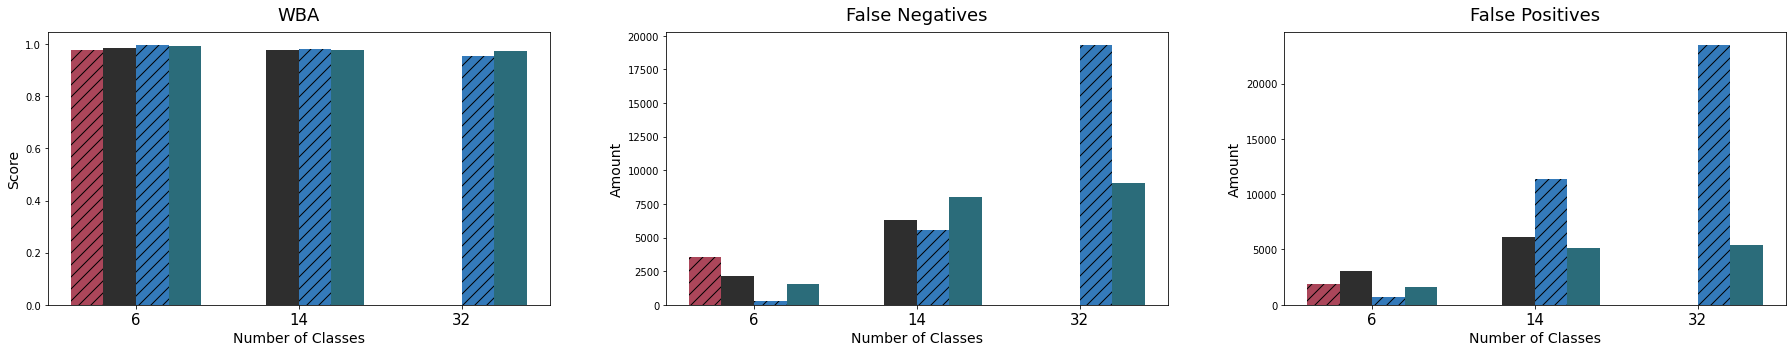

In [ ]:
fig = plt.figure(figsize=(25,5))

# ###### WBA
plt.subplot(1, 3, 1)
plt.title('WBA', fontsize=18, y=1.02)
plt.bar(x-1.5*width, WBA_cs, width, hatch='//', color="#ab465a")
plt.bar(x-0.5*width, WBA_bl, width, color="#2E2E2E")
plt.bar(x+1.5*width, WBA_pg, width, color="#2b6c7a")
plt.bar(x+0.5*width, WBA_sg, width, hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Score", fontsize=14)


###### FN
plt.subplot(1, 3, 2)
plt.title('False Negatives', fontsize=18, y=1.02)
plt.bar(x-1.5*width, FN_cs, width, hatch='//', color="#ab465a")
plt.bar(x-0.5*width, FN_bl, width, color="#2E2E2E")
plt.bar(x+1.5*width, FN_pg, width, color="#2b6c7a")
plt.bar(x+0.5*width, FN_sg, width, hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Amount", fontsize=14)


###### FP
plt.subplot(1, 3, 3)
plt.title('False Positives', fontsize=18, y=1.02)
plt.bar(x-1.5*width, FP_cs, width, hatch='//', color="#ab465a")
plt.bar(x-0.5*width, FP_bl, width, color="#2E2E2E")
plt.bar(x+1.5*width, FP_pg, width, color="#2b6c7a")
plt.bar(x+0.5*width, FP_sg, width, hatch="//", color="#347aba")
plt.xticks([0,1,2], labels, fontsize=15)
plt.xlabel("Number of Classes", fontsize=14)
plt.ylabel("Amount", fontsize=14)


plt.tight_layout(w_pad=6)
plt.show()

In [ ]:
fig.savefig('quality_diff_eq_var_size2.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
df['point_group'].value_counts()

m-3m     210714
mmm      183891
mm2      176558
-43m     153399
4/mmm    130289
2/m      130225
m        111203
4mm       91219
-3m       70114
-42m      61999
3m        41876
-6m2       9398
6/mmm      2512
-3         1550
-1         1426
1          1098
2           651
6mm         642
222         418
4/m         358
6/m         251
23          218
m-3         212
3           193
32          153
-4          118
422          99
432          85
622          70
6            69
4            51
-6           40
Name: point_group, dtype: int64

In [ ]:
# Explain space group vs point group in 32 classes case

accepted_classes = df['point_group'].value_counts()[:32].index.tolist()
XX = df[df['point_group'].isin(accepted_classes)].copy()
XX.groupby("point_group").size().sort_values(ascending=False)


point_group
m-3m     210714
mmm      183891
mm2      176558
-43m     153399
4/mmm    130289
2/m      130225
m        111203
4mm       91219
-3m       70114
-42m      61999
3m        41876
-6m2       9398
6/mmm      2512
-3         1550
-1         1426
1          1098
2           651
6mm         642
222         418
4/m         358
6/m         251
23          218
m-3         212
3           193
32          153
-4          118
422          99
432          85
622          70
6            69
4            51
-6           40
dtype: int64

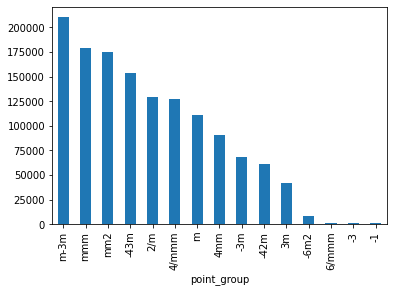

In [ ]:
XX.groupby("point_group").size().sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Explain space group vs point group in 32 classes case

accepted_classes = df['space_group_number'].value_counts()[:32].index.tolist()
XX = df[df['space_group_number'].isin(accepted_classes)].copy()

pd.DataFrame(XX.groupby(["point_group", "space_group_number"]).size()).reset_index().drop("space_group_number", axis=1).groupby("point_group").sum()

,0
point_group,
-1,1426
-3,1497
-3m,68748
-42m,61257
-43m,153259
-6m2,8551
2/m,129322
3m,41734
4/mmm,127267


In [ ]:
ZZ

,point_group,space_group_number,0
0,-1,2,1426
1,-3,148,1497
2,-3m,166,68748
3,-42m,119,61257
4,-43m,216,153259
5,-6m2,187,8551
6,2/m,10,62561
7,2/m,12,63158
8,2/m,14,2137
9,2/m,15,1466


In [ ]:
ZZ = XX.groupby(["point_group", "space_group_number"]).size().reset_index()

import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])



fig = px.sunburst(ZZ, path=["point_group", 'space_group_number' ], values=0)
fig.show()

fig.to_image(format="png")

ValueError: ignored

In [ ]:
pip install -U kaleido

In [ ]:

import pickle
with open('/content/drive/MyDrive/var_size_exp_dict.pkl', 'wb') as f:
    pickle.dump(var_size_exp_dict, f)


In [ ]:
with open("/content/drive/MyDrive/TemporaryColabData/tmp_exps.pkl", 'rb') as f:
    x = pickle.load(f)
#     # print(x)

In [ ]:
df_eval = pd.DataFrame(experiments).join(pd.DataFrame([exp['evaluation'] for exp in experiments])).drop("evaluation", axis=1)#.to_csv("eval.csv")
df_eval['WMCC'] = df_eval['WMCC'].apply(lambda x: (x+1)/2)
df_eval.to_csv("eval.csv")

In [ ]:
wba_lst = [elem['evaluation']['WBA'] for elem in experiments]
macro_f_lst = [elem['evaluation']['macro_f1'] for elem in experiments]
micro_f_lst = [elem['evaluation']['micro_f1'] for elem in experiments]
wmcc_lst = [(elem['evaluation']['WMCC'] + 1) / 2 for elem in experiments]
class_size_lst = [elem['n_classes'] for elem in experiments]
thresh_lst = [elem['thresh'] for elem in experiments]
data_size_lst = [elem['data_size'] for elem in experiments]
FN_lst = [elem['evaluation']['FN'] for elem in experiments]
FP_lst = [elem['evaluation']['FP'] for elem in experiments]

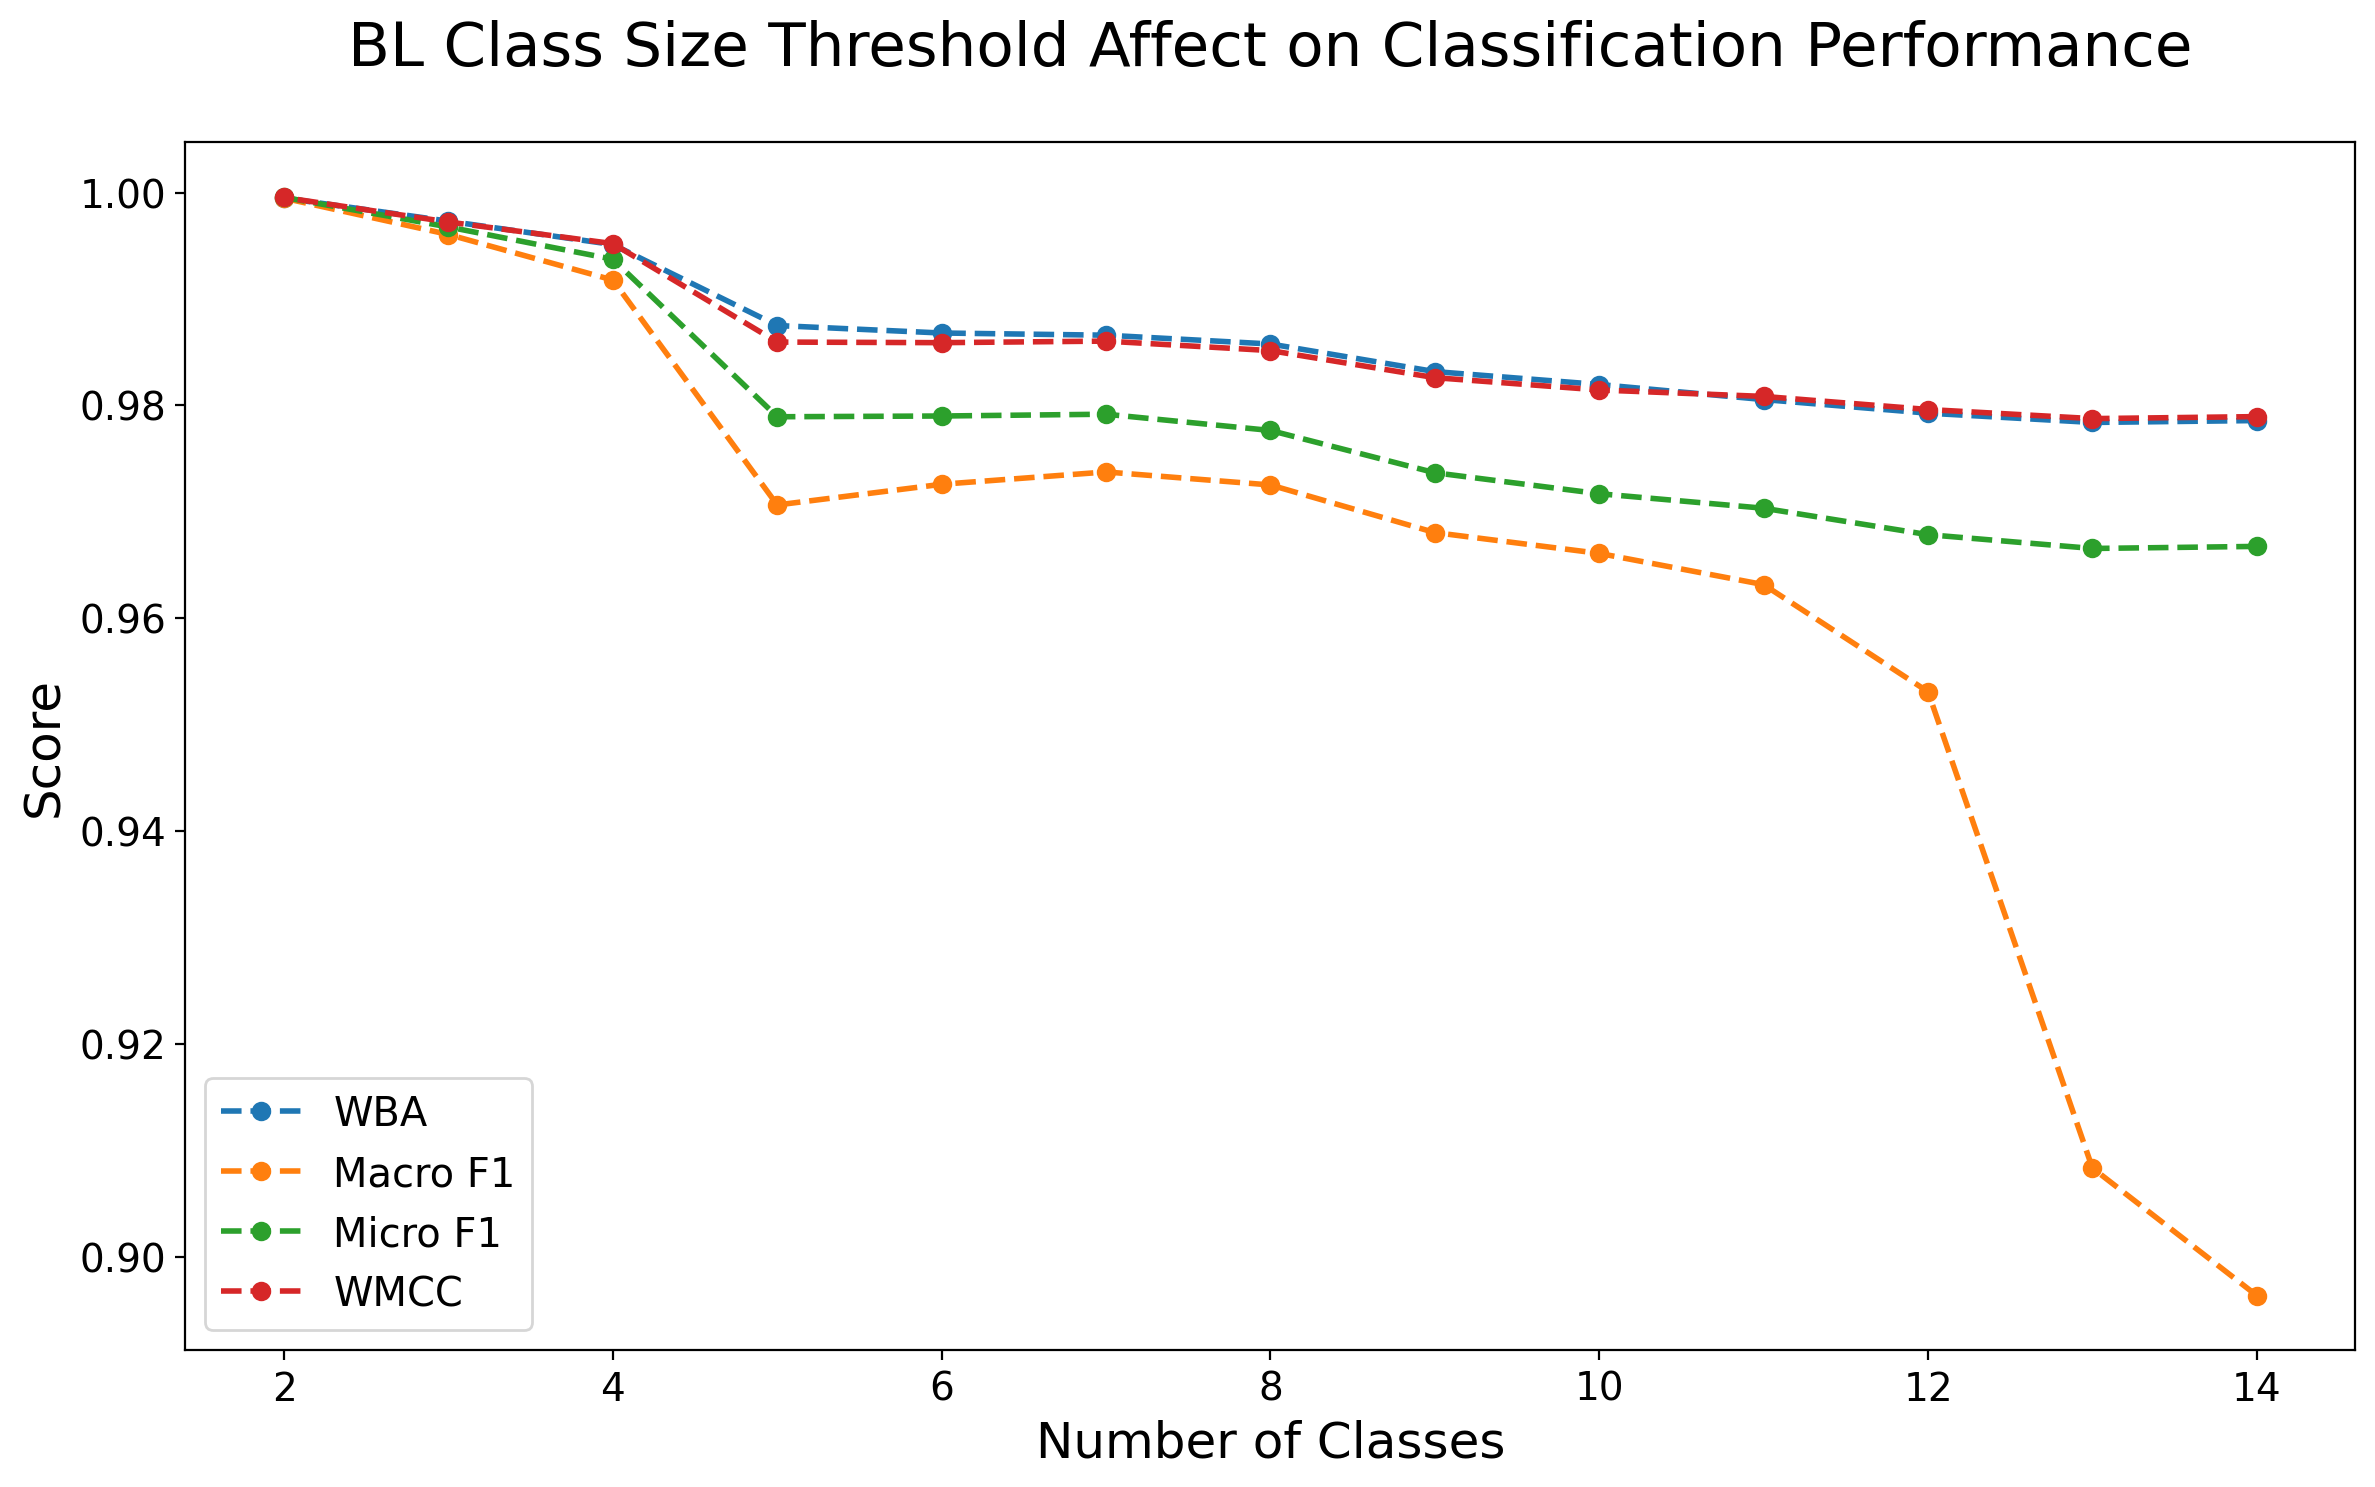

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(14, 8), dpi=200) # create figure & 1 axis


ax.plot(class_size_lst[:20], wba_lst[:20], label = 'WBA',  marker='o', linestyle='--', linewidth=2)
ax.plot(class_size_lst[:20], macro_f_lst[:20], label = 'Macro F1',  marker='o', linestyle='--', linewidth=2)
ax.plot(class_size_lst[:20], micro_f_lst[:20], label = 'Micro F1',  marker='o', linestyle='--', linewidth=2)
ax.plot(class_size_lst[:20], wmcc_lst[:20], label = 'WMCC',  marker='o', linestyle='--', linewidth=2)

      
plt.xlabel('Number of Classes', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend(loc='lower right')
plt.title('BL Class Size Threshold Affect on Classification Performance', fontsize=22, y=1.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize="x-large")
plt.show()

fig.savefig('class_filter_affect_bl_1.png')   # save the figure to file
plt.close(fig)    # close the figure window

In [ ]:
# plt.savefig("thresh_affect_class_change.png")
# plt.close(fig)    # close the figure window

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# figure(figsize=(14, 8), dpi=80)
fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(14, 8), dpi=200) # create figure & 1 axis

ax.plot(thresh_lst[:20], wba_lst[:20], label = 'WBA',  marker='o', linestyle='--', linewidth=2)
ax.plot(thresh_lst[:20], macro_f_lst[:20], label = 'Macro F1',  marker='o', linestyle='--', linewidth=2)
ax.plot(thresh_lst[:20], micro_f_lst[:20], label = 'Micro F1',  marker='o', linestyle='--', linewidth=2)
ax.plot(thresh_lst[:20], wmcc_lst[:20], label = 'WMCC',  marker='o', linestyle='--', linewidth=2)

      
plt.xlabel('Class Size Threshold', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend(loc='lower right')
plt.title('BL Class Size Threshold Affect on Classification Performance', fontsize=22, y=1.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xscale('log', basex=2)

plt.legend(fontsize=20) # using a size in points
plt.legend(fontsize="x-large")
# plt.show()

plt.savefig("class_filter_affect_bl_2.png")
plt.close(fig)    # close the figure window

In [ ]:


# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# figure(figsize=(14, 8), dpi=80)


# plt.plot(data_size_lst[:20], wba_lst[:20], label = 'WBA',  marker='o', linestyle='--', linewidth=2)
# plt.plot(data_size_lst[:20], macro_f_lst[:20], label = 'Macro F1',  marker='o', linestyle='--', linewidth=2)
# plt.plot(data_size_lst[:20], micro_f_lst[:20], label = 'Micro F1',  marker='o', linestyle='--', linewidth=2)
# plt.plot(data_size_lst[:20], wmcc_lst[:20], label = 'WMCC',  marker='o', linestyle='--', linewidth=2)

      
# plt.xlabel('Class Size Threshold', fontsize=18)
# plt.ylabel('Score', fontsize=18)
# plt.legend(loc='lower right')
# plt.title('Class Size Threshold Affect on Classification Performance', fontsize=22, y=1.05)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)



# plt.legend(fontsize=20) # using a size in points
# plt.legend(fontsize="x-large")
# plt.gca().invert_xaxis()
# plt.show() 

In [ ]:


# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure

# fig, ax = plt.subplots(1,1, figsize=(14,8))



# ax.plot(data_size_lst[:20], wba_lst[:20], label = 'WBA',  marker='o', linestyle='--', linewidth=2)
# ax.plot(data_size_lst[:20], macro_f_lst[:20], label = 'Macro F1',  marker='o', linestyle='--', linewidth=2)
# ax.plot(data_size_lst[:20], micro_f_lst[:20], label = 'Micro F1',  marker='o', linestyle='--', linewidth=2)
# ax.plot(data_size_lst[:20], wmcc_lst[:20], label = 'WMCC',  marker='o', linestyle='--', linewidth=2)

      
# plt.xlabel('Class Size Threshold', fontsize=18)
# plt.ylabel('Score', fontsize=18)
# ax.legend(loc='lower right')
# plt.title('Class Size Threshold Affect on Classification Performance', fontsize=22, y=1.05)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# ax.set_xticklabels([str(i) for i in data_size_lst[:20]])


# plt.legend(fontsize=20) # using a size in points
# plt.legend(fontsize="x-large")
# plt.gca().invert_xaxis()
# plt.show()

In [ ]:
wba_lst = [elem['evaluation']['WBA'] for elem in experiments]
macro_f_lst = [elem['evaluation']['macro_f1'] for elem in experiments]
micro_f_lst = [elem['evaluation']['micro_f1'] for elem in experiments]
wmcc_lst = [(elem['evaluation']['WMCC'] + 1) / 2 for elem in experiments]
class_size_lst = [elem['n_classes'] for elem in experiments]
thresh_lst = [elem['thresh'] for elem in experiments]
data_size_lst = [elem['data_size'] for elem in experiments]
FN_lst = [elem['evaluation']['FN'] for elem in experiments]
FP_lst = [elem['evaluation']['FP'] for elem in experiments]

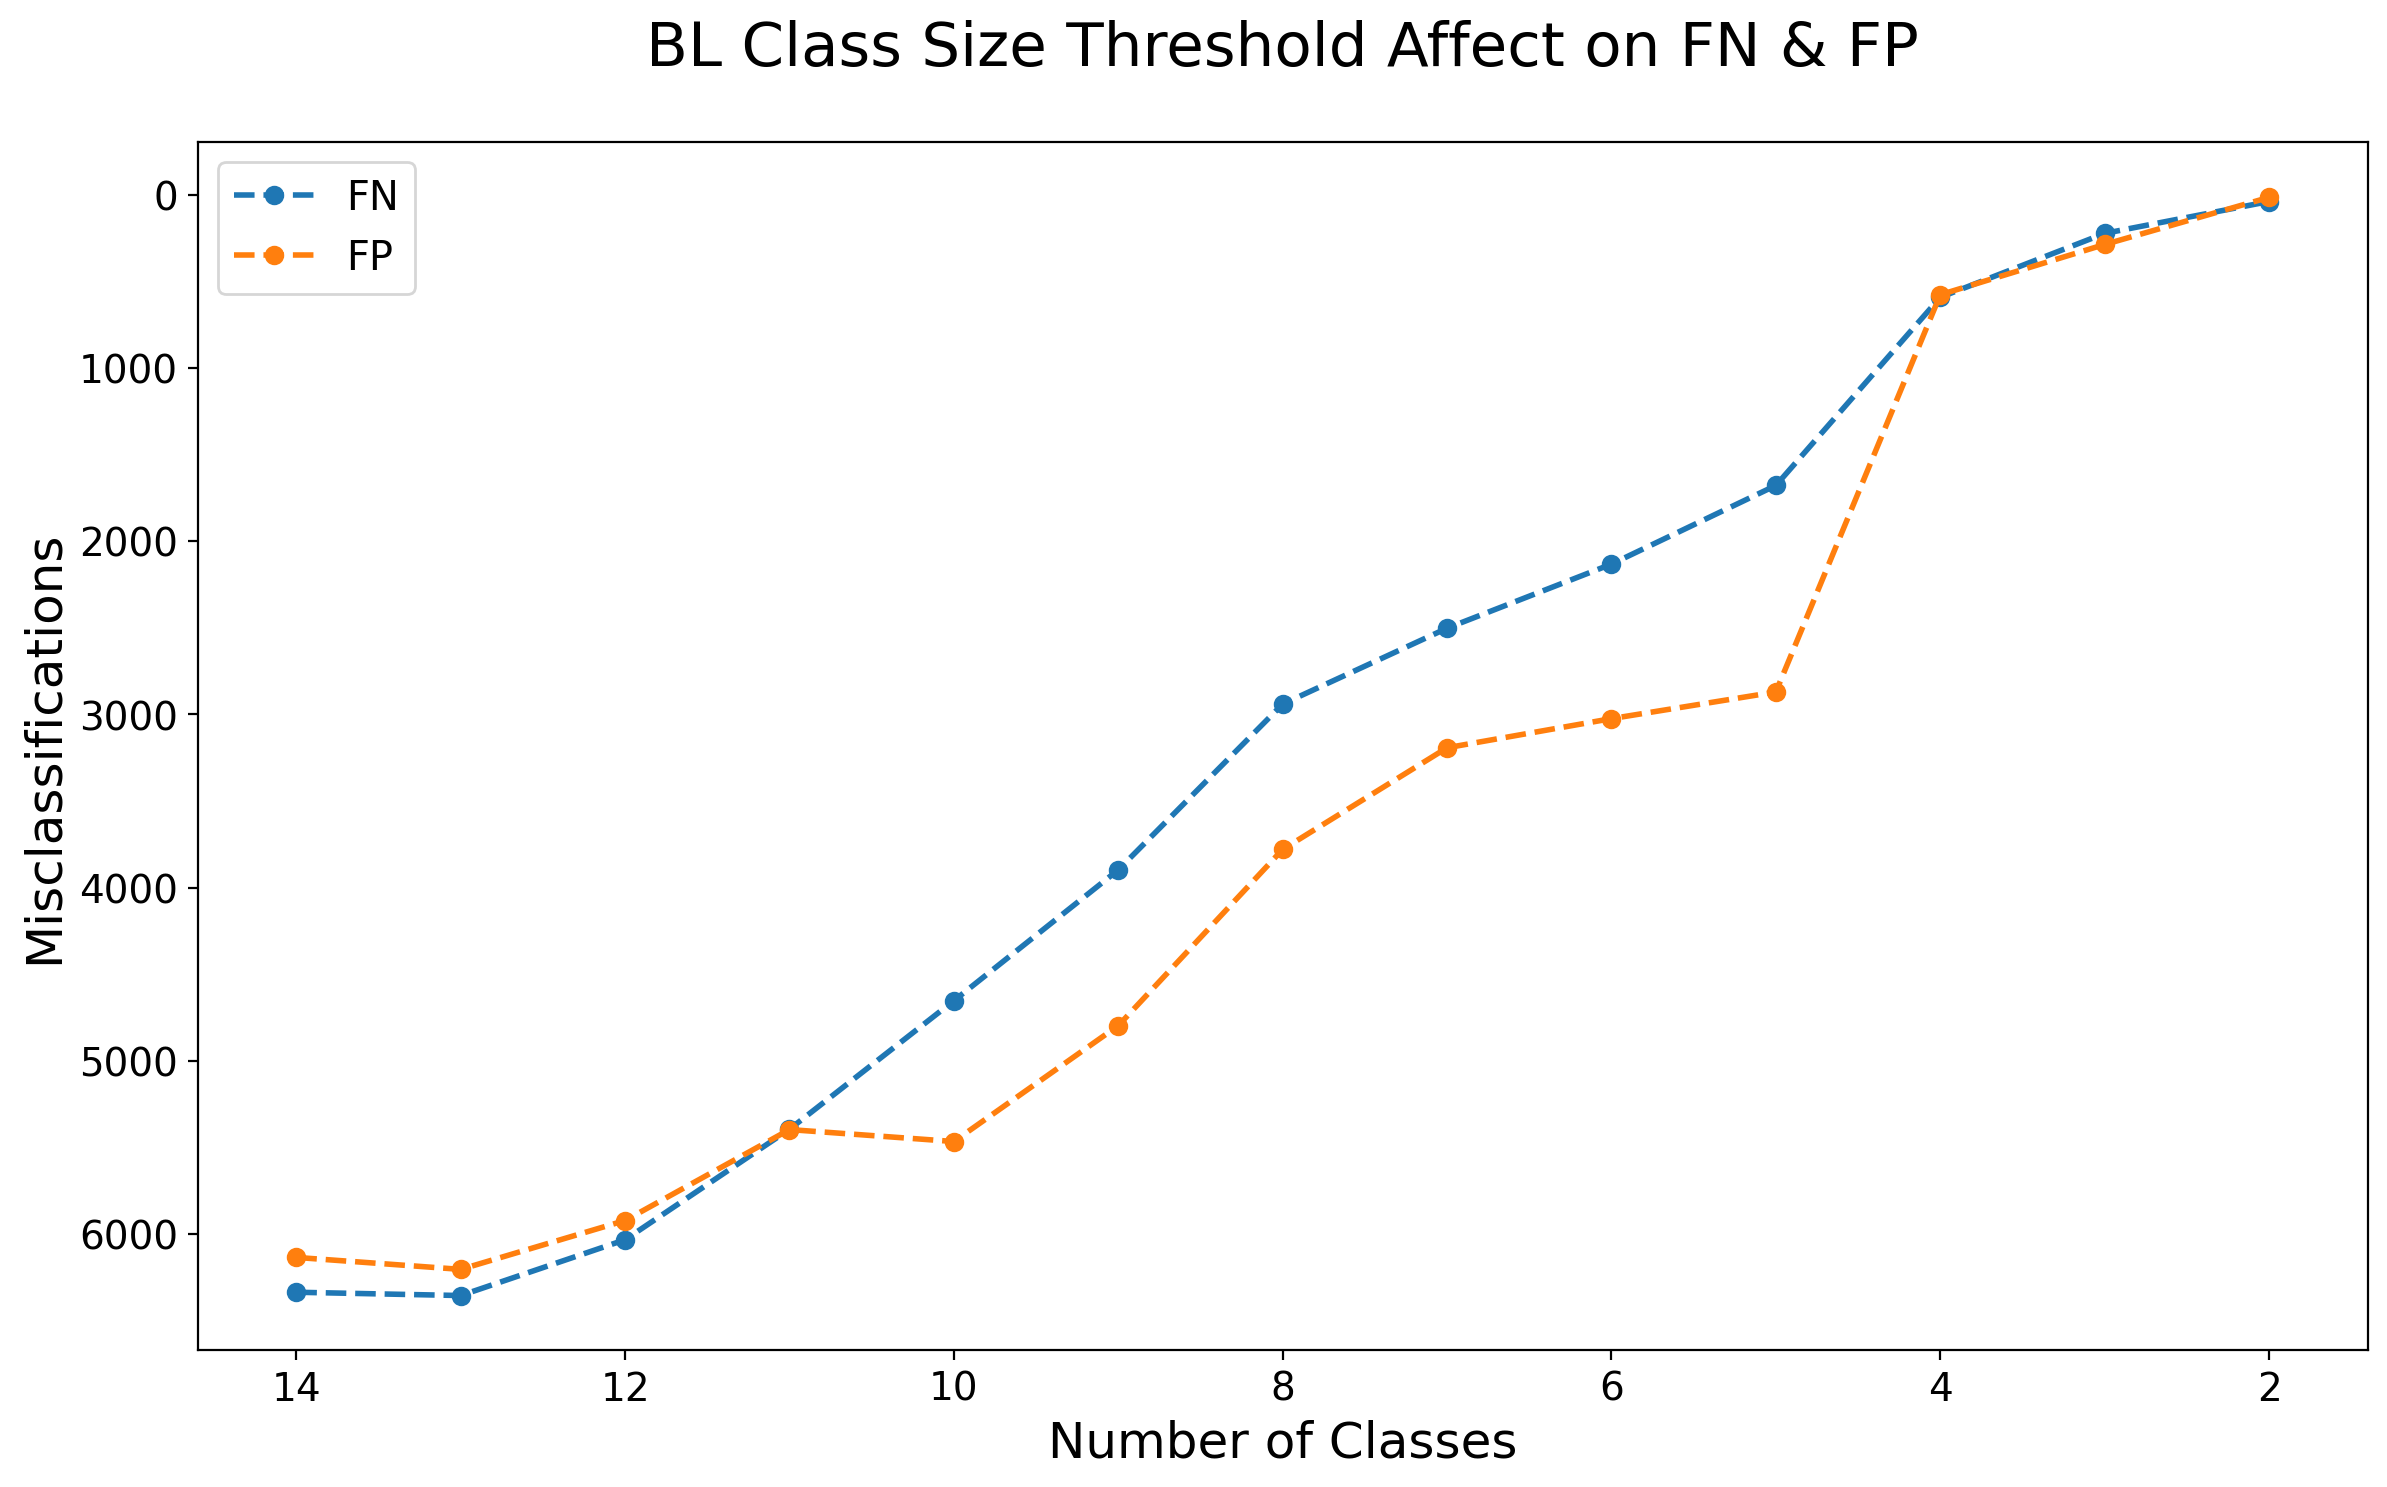

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(14, 8), dpi=200) # create figure & 1 axis
ax.plot(class_size_lst[:20], FN_lst[:20], label = 'FN',  marker='o', linestyle='--', linewidth=2)
ax.plot(class_size_lst[:20], FP_lst[:20], label = 'FP',  marker='o', linestyle='--', linewidth=2)


# Format
plt.xlabel('Number of Classes', fontsize=18)
plt.ylabel('Misclassifications', fontsize=18)
plt.legend(loc='lower right')
plt.title('BL Class Size Threshold Affect on FN & FP', fontsize=22, y=1.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize="x-large")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

fig.savefig('class_filter_affect_bl_errors.png')   # save the figure to file
plt.close(fig)